In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.signal

In [36]:
from Functions import *

In [37]:
from astropy.io import fits

In [38]:
hdul = fits.open("spec-0532-51993-0497.fits")
print(hdul[1].columns)

ColDefs(
    name = 'flux'; format = 'E'
    name = 'loglam'; format = 'E'
    name = 'ivar'; format = 'E'
    name = 'and_mask'; format = 'J'
    name = 'or_mask'; format = 'J'
    name = 'wdisp'; format = 'E'
    name = 'sky'; format = 'E'
    name = 'model'; format = 'E'
)


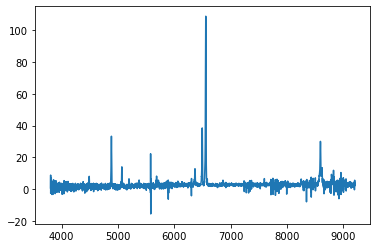

In [39]:
spec =  hdul[1].data['flux']
waves = 10**hdul[1].data['loglam']
plt.plot(waves, spec)

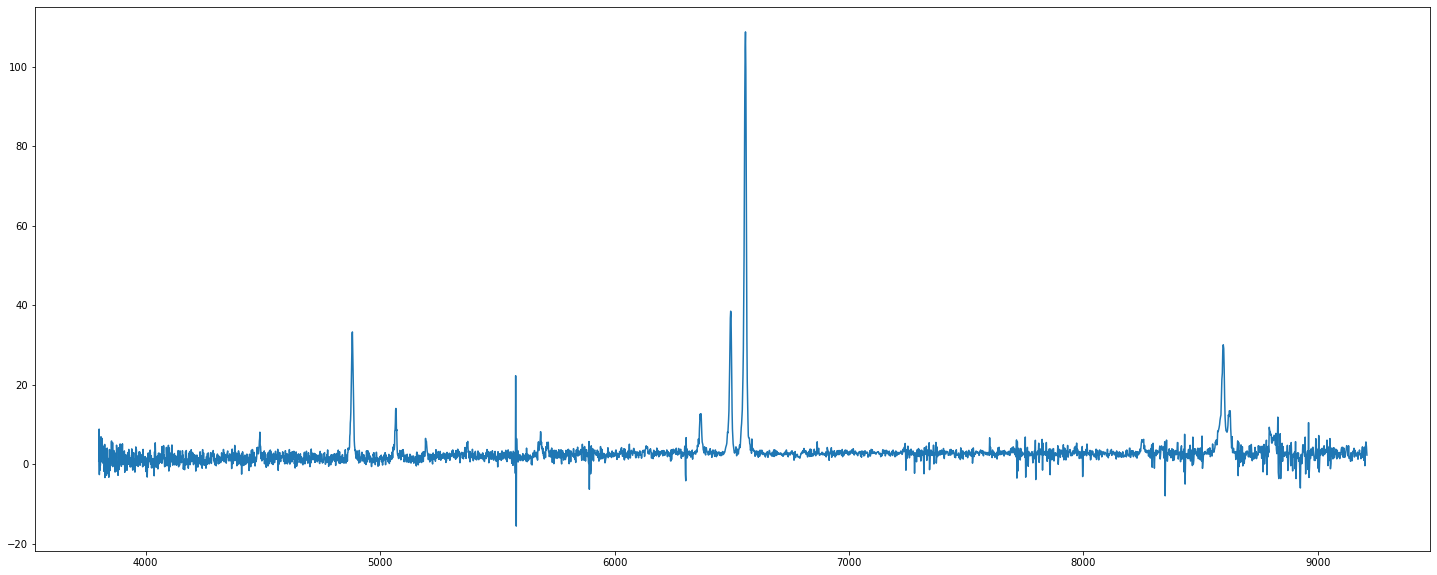

In [40]:
fig = plt.figure()
fig.set_size_inches(25,10)
plt.plot(waves, spec)
plt.show()

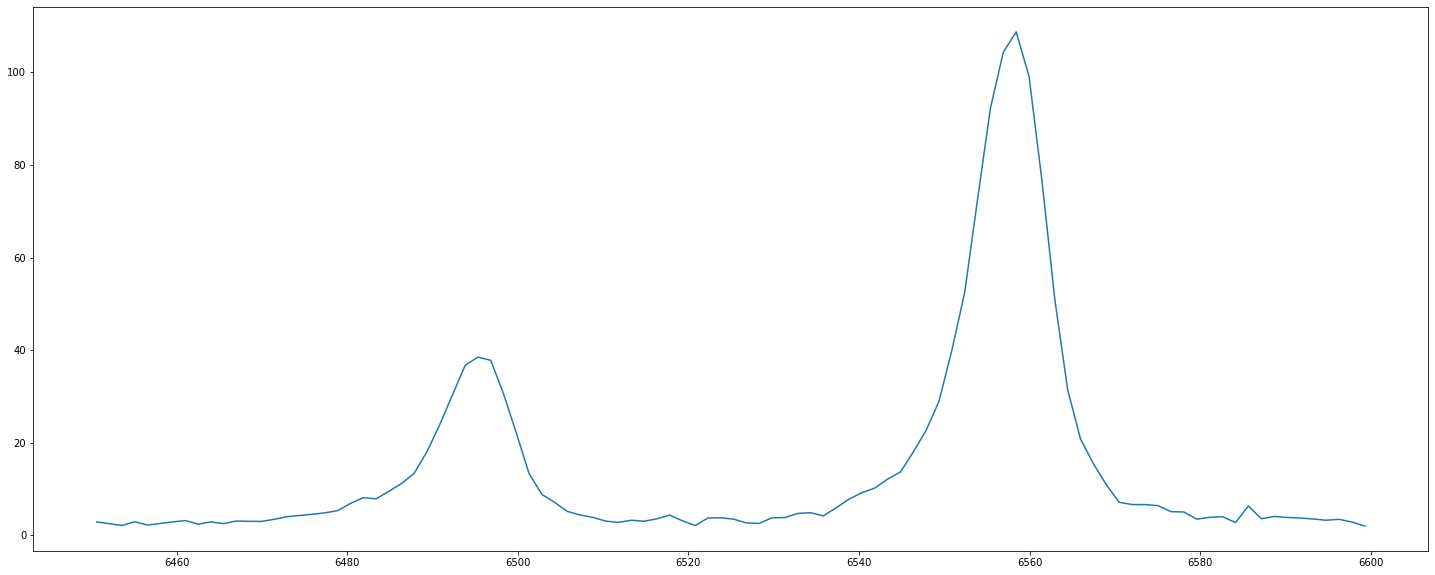

In [41]:
sub_i = np.where((waves > 6450) & (waves < 6600))
sub_spec = spec[sub_i]
sub_wave = waves[sub_i]
fig = plt.figure()
fig.set_size_inches(25, 10)
plt.plot(sub_wave, sub_spec)
plt.show()

In [42]:
spec_peaks = scipy.signal.find_peaks(sub_spec, height = 35)[0]
print(sub_wave[spec_peaks])

[6495.31   6558.4336]


Performing a least square fit...
Printing out the best fitting parameters and 1 std errors...
-----------------------------------------
Line 1 Amp: -60675.9993281816 Amp_error: inf

Line 2 Amp: -21118.43793023797 Amp_error: inf

Line 1 Wavelength: 7205940.389269261 Amp_error: inf

Line 2 Wavelength: -354161.55732575245 Amp_error: inf

Line width: 1560.3914345109297 Sigma_err: inf

Continuum level: 14.604549790998835 Amp_error: inf

Plotting the observered and modeled data...


C:\Users\csxj7\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


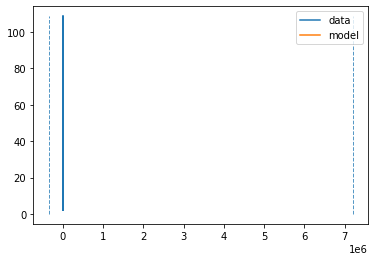

In [48]:
popt, pcov = fit_data(sub_wave, sub_spec, 40.0, 120.0, *su 5.0, 4.0)